In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import matplotlib.patches as mpatches

import sympy
import random

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)

import camb
from camb import model, initialpower


#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500);
pars.set_matter_power( kmax=2.0)

#pars.set_accuracy(AccuracyBoost=1)
#data = camb.get_transfer_functions(pars)
#transfer = data.get_cmb_transfer_data()
#
#
#plt.semilogx(transfer.q,transfer.delta_p_l_k[0,7,:],"r") #Null steht fuer ENERGIE Transfer func
reduced_h = 0.675
pars.set_accuracy(AccuracyBoost=2,lSampleBoost=100)
data = camb.get_transfer_functions(pars)
transfer = data.get_cmb_transfer_data()

In [104]:
As = 2.2e-9
ns = 0.986
k0 = 0.015


def Bessel(x,l):
    return sp.special.spherical_jn(l,x)

def S_1(k1):
    
    return np.exp(20*k1)

def S_2(k2):
    
    return np.exp(20*k2)

def S_3(k3):
    
    return np.exp(20*k3)


In [85]:
def Int(x,l_index,l_index_index):
    
    Stepwidth = transfer.q[1:]-transfer.q[:-1]
    Delta = transfer.delta_p_l_k[0,l_index,:][:-1]
    
    if(l_index_index == 1):
        Svals = S_1(transfer.q[:-1])
    if(l_index_index == 2):
        Svals = S_2(transfer.q[:-1])
    if(l_index_index == 3):
        Svals = S_3(transfer.q[:-1])
        
    Del_Step = Stepwidth * Delta * Svals
    j_l = Bessel(np.tensordot(transfer.q[:-1],x,0),transfer.l[l_index])
    Integral = Del_Step.dot(j_l)
    
    return Integral


In [86]:
def FatInt(l1_index,x_sample,l2_index = 0,l3_index = 0,PlotIntegrand = False, UseSameInt = False):
    
    #If S happens to factor into f(k1)*f(k2)*f(k3), one can set UnseSameInt = True, if all ls are the same.
    
    if(l2_index == 0):
        l2_index = l1_index
        l3_index = l1_index
    
    Norming = (2./np.pi)**3
    
    Stepwidth = x_sample[1:]-x_sample[:-1]
    x_squared_Stepwidth = x_sample[:-1]**2*Stepwidth
    
    if(UseSameInt == False):

        Integralvalue = x_squared_Stepwidth.dot((Int(x_sample,l1_index,1)*Int(x_sample,l2_index,2)*Int(x_sample,l3_index,3))[:-1])
        if(PlotIntegrand == True):

            #print("FOLLOWING PLOT: L = {}".format(transfer.l[l1_index]))
            plt.plot(x_sample,x_sample**2*Int(x_sample,l1_index,1)**3)
            plt.show()
        return Integralvalue*Norming
    
    if(UseSameInt == True and l1_index == l2_index == l3_index):

        Integralvalue = x_squared_Stepwidth.dot(Int(x_sample,l1_index,1)[:-1]**3)
        if(PlotIntegrand == True):

            #print("FOLLOWING PLOT: L = {}".format(transfer.l[l1_index]))
            plt.plot(x_sample,x_sample**2*Int(x_sample,l1_index,1)**3)
            plt.show()
        return Integralvalue*Norming
        
        
    else:
        print("THE L ARE NOT THE SAME; MAN")
        
        

In [87]:
def getx(l_index):
    l = transfer.l[l_index]
    
    if(0<= l <= 5):
        return np.linspace(0,30000,800)
    if(5< l <= 10):
        return np.linspace(7000,20000,800)
    if(10< l <= 30):
        return np.linspace(12000,17000,400)
    if(30< l <= 70):
        return np.linspace(12500,15000,400)
    if(70< l <= 170):
        return np.linspace(12500,15000,400)
    if(170< l <= 220):
        return np.linspace(13300,14500,400)
    if(220< l <= 269):
        return np.linspace(13300,14100,400)
    if(269<l < 320):
        return np.linspace(13400,14000,400)
    if(320 <l < 360):
        return np.linspace(13400,14000,400)
    if(360 <l < 440):
        return np.linspace(13650,14000,400)
    if(440 <l < 500):
        return np.linspace(13600,14000,400)
    else:
        return np.linspace(13600,14000,400)
    

In [89]:
def getx_more(l_index):
    l = transfer.l[l_index]
    
    if(0<= l <= 5):
        return np.linspace(0,30000,800)
    if(5< l <= 10):
        return np.linspace(7000,20000,800)
    if(10< l <= 30):
        return np.linspace(12000,17000,200)
    if(30< l <= 70):
        return np.linspace(12500,15000,200)
    if(70< l <= 170):
        return np.linspace(12500,15000,200)
    if(170< l <= 220):
        return np.linspace(13300,14500,200)
    if(220< l <= 269):
        return np.linspace(13300,14100,200)
    if(269<l < 320):
        return np.linspace(13400,14000,200)
    if(320 <l < 360):
        return np.linspace(13400,14000,200)
    if(360 <l < 440):
        return np.linspace(13300,14000,200)
    if(440 <l < 500):
        return np.linspace(13300,14000,200)
    else:
        return np.linspace(13600,14000,200)
    

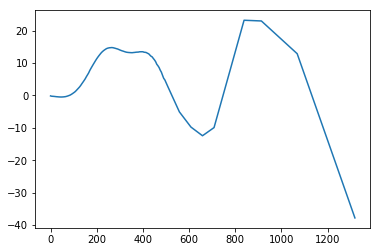

In [112]:
plt.plot(Reduced_L_List,np.array(IntArray))

plt.show()

In [106]:
IntArray = []
Reduced_L_List = l_list[::5]
for l_index in Reduced_L_List:
    print(l_index)
    IntArray.append(FatInt(l_index,getx_more(l_index),UseSameInt=True)/blll_const(transfer.l[l_index]))

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
508
558
608
658
708
778
838
913
1068
1318


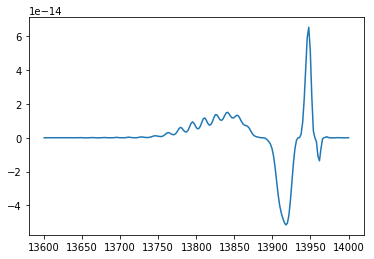

14.532475319375683

In [110]:
l_index = 800
FatInt(l_index,getx_more(l_index),UseSameInt=True,PlotIntegrand = True)/blll_const(transfer.l[l_index])

In [51]:
x_sample = np.linspace(12000,17000,400)
x1,y1 = FatInt(l1,x_sample,PlotIntegrand = True)
x2,y2 = FatInt(l2,x_sample,PlotIntegrand = True)
x3,y3 = FatInt(l3,x_sample,PlotIntegrand = True)
#x4,y4 = FatInt(20,x_sample,PlotIntegrand = True)

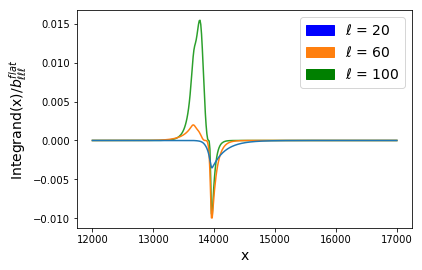

In [56]:


l1 = 20
l2 = 60
l3 = 100

l_list = np.load("l_list.npy")
x = getx(l_index)
x = np.linspace(0,20000,400)
#plt.text(2500,-1*10**-12,r"$\ell$ = 60",fontsize = 20)
plt.xlabel("x", fontsize = 14)
plt.ylabel(r"Integrand(x)/$b_{\ell\ell\ell}^{flat}$",fontsize = 14)
#IntVals = []
l_index = 60
#plt.plot(x4,y4)
plt.plot(x3,y3/blll_const(transfer.l[l3]),"C2")
plt.plot(x2,y2/blll_const(transfer.l[l2]),"C1")
plt.plot(x1,y1/blll_const(transfer.l[l1]),"C0")
Ora = mpatches.Patch(color = "C1",label = r"$\ell$ = {}".format(l2))
Grun = mpatches.Patch(color = "green",label = r"$\ell$ = {}".format(l3))
Blue = mpatches.Patch(color = "blue",label = r"$\ell$ = {}".format(l1))

plt.legend(handles =  [Blue,Ora,Grun],fontsize = 14)

###plt.savefig("IntegrandsFactorized.pdf",format = "pdf")
plt.show()

In [56]:
def blll_const(l1,l2= 0 ,l3 = 0):
    
    if(l2 == 0):
        l2 = l1
        l3 = l1
    
    return 1/27*1/(2*l1+1)*1/(2*l2+1)*1/(2*l3+1)*(1/((l1+l2+l3)+3)+1/(l1+l2+l3))


In [97]:
np.save("Flat_blll.npy",IntVals3)

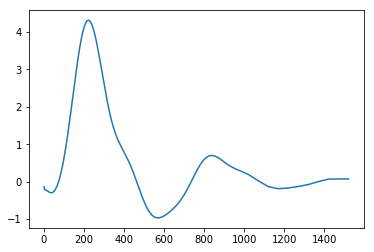

In [96]:
b_lll_Flat = []
for i in range(len(l_list)):
    b_lll_Flat.append(IntVals3[i]/blll_const(transfer.l[l_list[i]]))

b_lll_Flat[269] = (b_lll_Flat[270]+b_lll_Flat[268])/2
plt.plot(transfer.l[l_list], b_lll_Flat)

plt.show()

In [43]:
def blll_const(l1,l2= 0 ,l3 = 0):
    
    if(l2 == 0):
        l2 = l1
        l3 = l1
    
    return 1/27*1/(2*l1+1)*1/(2*l2+1)*1/(2*l3+1)*(1/((l1+l2+l3)+3)+1/(l1+l2+l3))
